In [2]:
## import necessary libraries
import numpy as np
import pandas as pd

## read the raw data file
df = pd.read_csv('../raw_data/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

# drop duplicates
df.drop_duplicates(inplace=True)

# convert data types
df[['Diabetes_012','GenHlth', 'Age', 'Education','Income']] = df[['Diabetes_012','GenHlth', 'Age', 'Education','Income']].astype(int)
df.info()

#slice the dataframe for feature and label
df_copy = df.copy(deep=True)
X, y = df_copy.iloc[:,1:], df_copy.iloc[:,0]
print(X.shape)
print(y.shape)

#get dummies
def get_dummies(X):

    # Identify discrete columns with more than 2 categories
    discrete_columns = [col for col in X.columns if X[col].nunique() > 2 and X[col].dtype != 'float64']

    # Create dummy variables for these columns
    df_with_dummies = pd.get_dummies(X, columns=discrete_columns, drop_first=True)

    return df_with_dummies
X = get_dummies(X)
X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          229781 non-null  int64  
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   HeartDiseaseorAttack  229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  int64  
 15  

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,1,0,0,0,0,0,0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

## Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [4]:
#SMOTE technique
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X_train, y_train)

array([[<AxesSubplot:title={'center':'HighBP'}>,
        <AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Smoker'}>,
        <AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'HeartDiseaseorAttack'}>],
       [<AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>,
        <AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>,
        <AxesSubplot:title={'center':'MentHlth'}>],
       [<AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'GenHlth_2'}>,
        <AxesSubplot:title={'center':'GenHlth_3'}>,
        <Axe

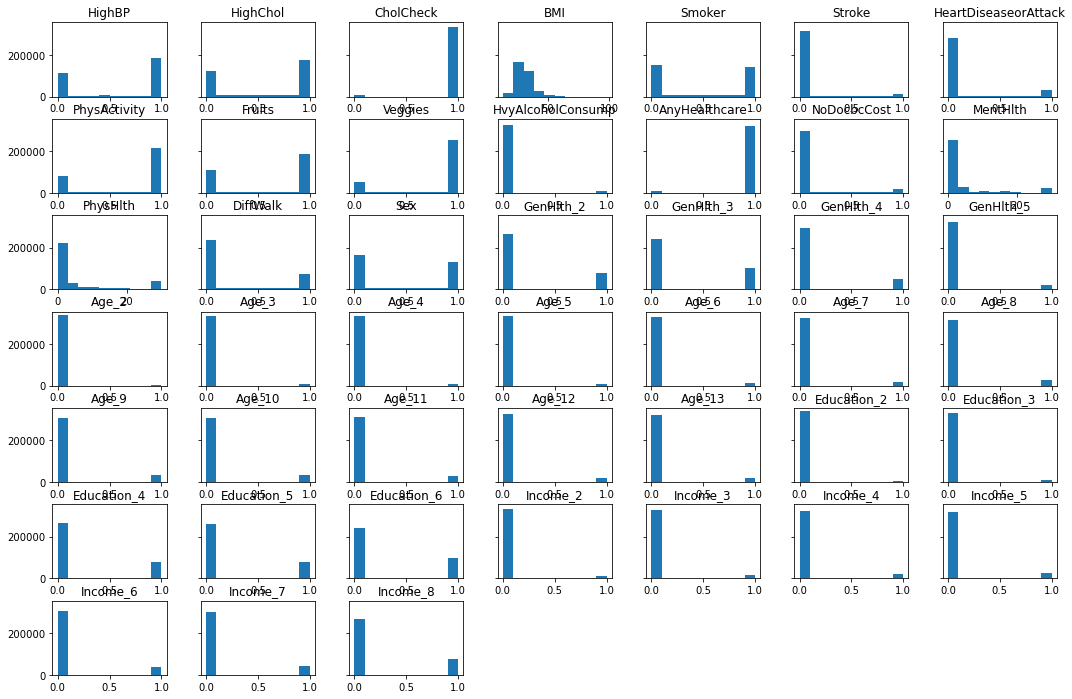

In [5]:
X_smote.hist(figsize=(18,12), grid=False, sharey=True)

In [4]:
## Standard scaling
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_smote)
X_scaled_test = scalar.fit_transform(X_test)

In [5]:
## This is the baseline dummy classifier which classifies all as the majority class

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_scaled, y_smote)
y_dummy_prediction = dummy_majority.predict(X_scaled_test)

## calculate metrics
accuracy = accuracy_score(y_test, y_dummy_prediction)
precision = precision_score(y_test, y_dummy_prediction, average='macro')
recall = recall_score(y_test, y_dummy_prediction, average='macro')
f1 = f1_score(y_test, y_dummy_prediction, average='macro')
print('Unique predicted labels: ', (np.unique(y_dummy_prediction)))
print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

Unique predicted labels:  [0]
accuracy : 0.8288055008540686  precision : 0.2762685002846895 
 recall : 0.3333333333333333  f1 : 0.3021299970452513


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
# Moving forward with l2 logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Training the logistic regression model
clf = LogisticRegression(penalty='l2', max_iter=1000, solver='newton-cg')

clf.fit(X_scaled, y_smote)

# Making predictions
y_pred = clf.predict(X_scaled_test)
y_pred_proba = clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.1615114292863904  precision : 0.4117554496466231 
 recall : 0.37728604416356964  f1 : 0.15242808961503637


In [7]:
## we can see that the baseline model logistic regression perform poorly
## try KNN classifier

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Setting up the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_scaled, y_smote)

# Making predictions
y_pred = knn.predict(X_scaled_test)
y_pred_proba = knn.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.6711020203888459  precision : 0.39395684891565197 
 recall : 0.4221432298421741  f1 : 0.39274336339790933


In [17]:
## we can see that the baseline model logistic regression perform poorly
## try KNN classifier

from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

# Setting up the KNN classifier
svc = LinearSVC()

svc.fit(X_scaled, y_smote)

# Making predictions
y_pred = svc.predict(X_scaled_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.24631988946068564  precision : 0.42308403771803565 
 recall : 0.41862471544098795  f1 : 0.2314517277484871


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
# Making predictions
y_pred = svc.predict(X_scaled_test)
print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.9717    0.1422    0.2481     76178
           1     0.0135    0.3048    0.0259      1824
           2     0.2840    0.8089    0.4204     13911

    accuracy                         0.2463     91913
   macro avg     0.4231    0.4186    0.2315     91913
weighted avg     0.8486    0.2463    0.2698     91913

[[10832 38170 27176]
 [   76   556  1192]
 [  239  2420 11252]]


In [8]:
## we can see that both logistic regression and KNN perform very poorly, lets try more models

## Decision trees
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_scaled, y_smote)

# Making predictions
y_pred = tree_clf.predict(X_scaled_test)
y_pred_proba = tree_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.13066704383493086  precision : 0.26937229543069185 
 recall : 0.3421701194394922  f1 : 0.10531703335688712


In [ ]:
## linear support vector classifier

from sklearn.svm import SVC

svc_clf = SVC(kernel='rbf')
svc_clf.fit(X_scaled, y_smote)

# Making predictions
y_pred = svc_clf.predict(X_scaled_test)
# y_pred_proba = svc_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

In [5]:
## implement the naive bayes algorithm

from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_scaled, y_smote)

# Making predictions
y_pred = NB_clf.predict(X_scaled_test)
y_pred_proba = NB_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.3378956186828849  precision : 0.4144583768120907 
 recall : 0.426148496525581  f1 : 0.2863866307802525


In [10]:
## random forest prediction

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
rf_clf.fit(X_scaled, y_smote)

# Making predictions
y_pred = rf_clf.predict(X_scaled_test)
y_pred_proba = rf_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.14977206706341867  precision : 0.05928152034475307 
 recall : 0.3427205861951983  f1 : 0.10107148050319281


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
## gradient boosing decision trees (GBDT)
from sklearn.ensemble import GradientBoostingClassifier

GBDT_clf = GradientBoostingClassifier(n_estimators=300)
GBDT_clf.fit(X_scaled, y_smote)

# Making predictions
y_pred = GBDT_clf.predict(X_scaled_test)
y_pred_proba = GBDT_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.0884314514812921  precision : 0.11539860672667551 
 recall : 0.37323817324923986  f1 : 0.14329989938769475


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=300)
ada_clf.fit(X_scaled, y_smote)

# Making predictions
y_pred = ada_clf.predict(X_scaled_test)
y_pred_proba = ada_clf.predict_proba(X_scaled_test)[:, 1]

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Performing 5-fold cross-validation
# cv_scores = cross_val_score(knn, X, y, cv=5)
# cv_scores

print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
      % (accuracy, precision, recall, f1))

accuracy : 0.07185055432854982  precision : 0.14018173256299732 
 recall : 0.37673455437890246  f1 : 0.14102033179885795


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
## implement the naive bayes algorithm

from sklearn.neighbors import KNeighborsClassifier

param_grid = [1, 2, 3, 4, 5]

for value in param_grid:
    clf = KNeighborsClassifier(n_neighbors=value)
    clf.fit(X_scaled, y_smote)

    y_pred = clf.predict(X_scaled_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print('current parameter is n_estimator = {}'.format(value))

    print('accuracy : %s  precision : %s \n recall : %s  f1 : %s'
        % (accuracy, precision, recall, f1))

current parameter is n_estimator = 1
accuracy : 0.6921980568581159  precision : 0.3832062840442416 
 recall : 0.40216213917253274  f1 : 0.38548709886214166
current parameter is n_estimator = 2
accuracy : 0.7443887154156648  precision : 0.3881726943247439 
 recall : 0.3855337764696265  f1 : 0.3850191081829298
current parameter is n_estimator = 3
accuracy : 0.6861923775744454  precision : 0.3893834367897768 
 recall : 0.41376061124199076  f1 : 0.3912668281318565
current parameter is n_estimator = 4
accuracy : 0.7116294756998466  precision : 0.39393023744029615 
 recall : 0.4075505598585368  f1 : 0.39538872442986794
current parameter is n_estimator = 5
accuracy : 0.6711020203888459  precision : 0.39395684891565197 
 recall : 0.4221432298421741  f1 : 0.39274336339790933


In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[55094  1020  6511]
 [ 5038   146   957]
 [16046   658  6443]]


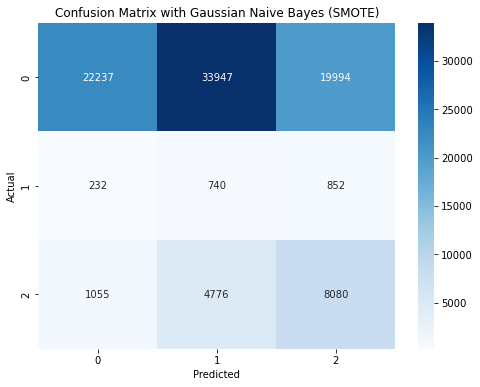

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn for a nicer display
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=NB_clf.classes_, yticklabels=NB_clf.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix with Gaussian Naive Bayes (SMOTE)')
plt.show()

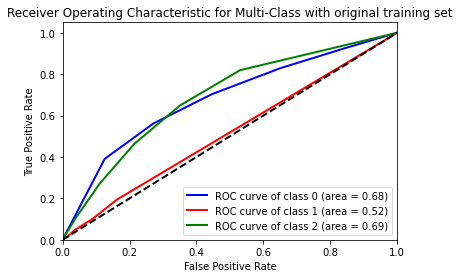

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 3 classes: 0, 1, and 2
n_classes = 3

# Binarize the output labels for OvR
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = clf.predict_proba(X_scaled_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class with original training set')
plt.legend(loc="lower right")
plt.show()